# Prediction using supervised ML Task 1 GRIP

### Done by : TV Hemanth Reddy

#### We will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Import Required Libraries

In [113]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [114]:
# Read data From URL
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [115]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Ploting data

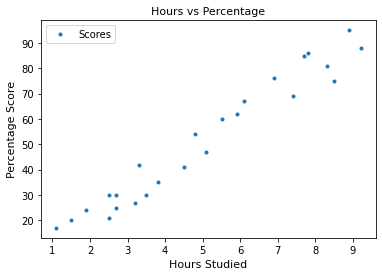

In [116]:
data.plot(x='Hours', y='Scores', style='.')  
plt.title('Hours vs Percentage', fontsize=11)  
plt.xlabel('Hours Studied', fontsize=11)  
plt.ylabel('Percentage Score', fontsize=11) 
plt.show()

### Getting Regional Plot

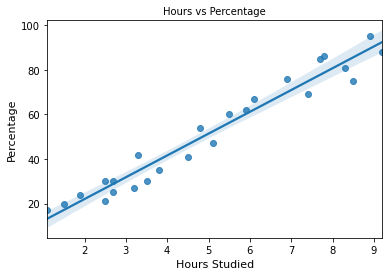

In [117]:
sns.regplot(x='Hours',y='Scores',data=data)
plt.title("Hours vs Percentage", fontsize=10)
plt.xlabel("Hours Studied", fontsize=11)
plt.ylabel("Percentage", fontsize=11)
plt.show()

### Preparing Data

In [118]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values

### Randomly Split data into train and test

In [119]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0)

In [120]:
print(X_train.shape," ",X_test.shape," ",Y_train.shape," ",Y_test.shape)

(20, 1)   (5, 1)   (20,)   (5,)


### Importing Model and Training Model

In [121]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print(".....Training successfully completed.....")

.....Training successfully completed.....


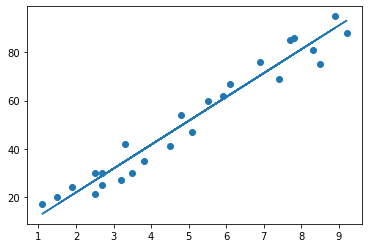

In [122]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Prediction

In [123]:
print(X_test)
y_pred=regressor.predict(X_test) # Predicting the scores
print('\n','\n',y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]

 
 [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


### Comparing Ground_truth Values with Predicted Values

In [124]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [125]:
df.describe()

,Actual,Predicted
count,5.000000,5.000000
mean,41.600000,42.651852
std,22.255336,24.407192
min,20.000000,16.884145
25%,27.000000,26.794801
50%,30.000000,33.732261
75%,62.000000,60.491033
max,69.000000,75.357018


### Prediction on our own data

In [126]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### Evaluating Model

In [127]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 21.5987693072174
